# Outliers 👨🏻‍💻
---
## Session 4  Agenda
* [About dataset]()
* [Load required libraries]()
* [Load `Boston Dataset`]()
* [Detecting the outliers]()
  * 1.Visualization
    *  Example 1: Using Box Plot
    *  Example 2: Using ScatterPlot
  * 2.`Z-score`
  * 3.`IQR` (Inter Quartile Range)
* [Removing the Outliers]()
* [Visualization of Outliers]()
* [Usefull NOTES To Read]()

## *`About dataset`* ##
---
- So, Let’s get start. We will be using `Boston House Pricing Dataset` which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.

### *Load required libraries*:


In [ ]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

### *Load `Boston Dataset`*

In [ ]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
df_boston = pd.DataFrame(boston.data)
df_boston.columns = columns
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## *`Detecting the outliers`*
---
- **Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach. All of these are discussed below.**

## 1. *`Visualization`*
---

### ***Example 1: Using Box Plot***

It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


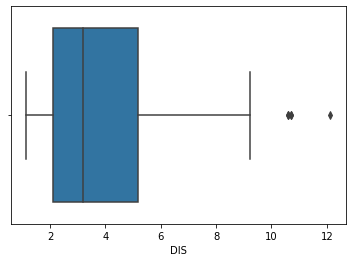

In [ ]:
# Box Plot

sns.boxplot(df_boston['DIS']) ;

In [ ]:
q1 = df_boston[df_boston['DIS']<10]['DIS'].quantile(0.25)
q3 = df_boston[df_boston['DIS']<10]['DIS'].quantile(0.75)
iqr = q3 - q1
max1 = q3 + (1.5 * iqr)
print(max1)

9.65945


 **NOTE😉** :
 - **In the above graph, can clearly see that values above 10 are acting as the outliers.**

In [ ]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


### ***Example 2: Using ScatterPlot.***

It is used when you have paired numerical data, or when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

To plot the scatter plot one requires two variables that are somehow related to each other. So here, ‘Proportion of non-retail business acres per town’ and ‘Full-value property-tax rate per $10,000’ are used whose column names are “INDUS” and “TAX” respectively.

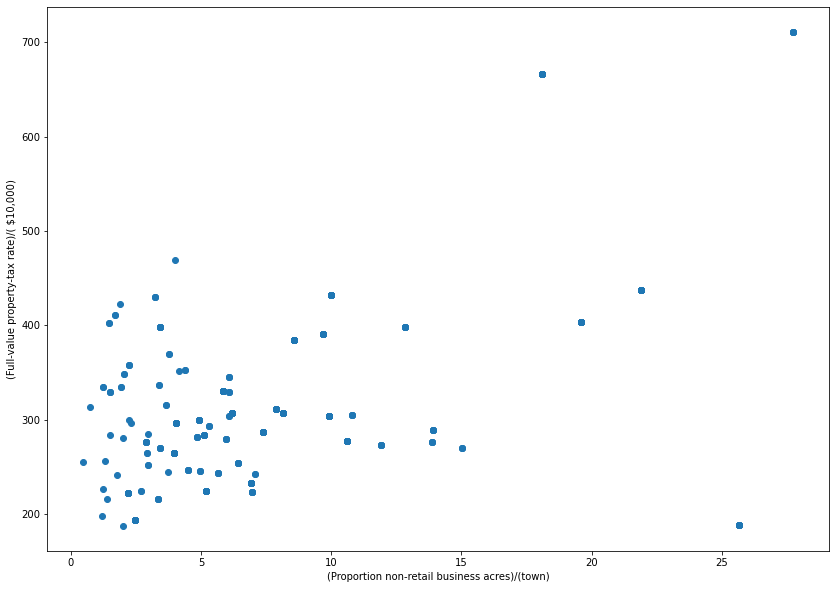

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (14,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

 **NOTE😉** :
 - **Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.**

 **NOTE😉** :
 - **Using approximation can say all those data points that are x>20 and y>600 are outliers. The following code can fetch the exact position of all those points that satisfy these conditions.**

In [ ]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))


(array([488, 489, 490, 491, 492], dtype=int64),)


## 2. *`Z-score`*
---

Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

**`Zscore = (data_point -mean) / std. deviation`**

In [ ]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_boston['DIS']))
#print(z)


The above output is just a snapshot of part of the data; the actual length of the list(z) is 506 that is the number of rows. It prints the z-score values of each data item of the column

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))


(array([351, 352, 353, 354, 355], dtype=int64),)


## 3. *`IQR` (Inter Quartile Range)*
---

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

**`IQR = Quartile3 – Quartile1`**

In [ ]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

3.0646000000000004


To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

`upper = Q3 +1.5*IQR`

`lower = Q1 – 1.5*IQR`

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
# Above Upper bound
x=(Q3+1.5*IQR)
print("Highest allowed", x)
upper = df_boston[(df_boston['DIS'] >= x)]

upper

Highest allowed 9.76185


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57


In [ ]:
# Below Lower bound
x= (Q1-1.5*IQR)
print(x)
lower = df_boston[(df_boston['DIS'] <= x)]

lower


-2.496550000000001


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


## *`Removing the Outliers`*
---

In [ ]:
# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
original_df = df_boston.copy() # deep copy
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)
df_boston["DIS"].describe

New Shape:  (501, 13)


<bound method NDFrame.describe of 0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 501, dtype: float64>

 **NOTE😉** :
 - Take a Look at Min and Max values

In [ ]:

df_boston["DIS"].describe()

count    501.000000
mean       3.723699
std        1.989647
min        1.129600
25%        2.088200
50%        3.152300
75%        5.116700
max        9.222900
Name: DIS, dtype: float64

## *`Visualization of Outliers`*

---

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asset\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

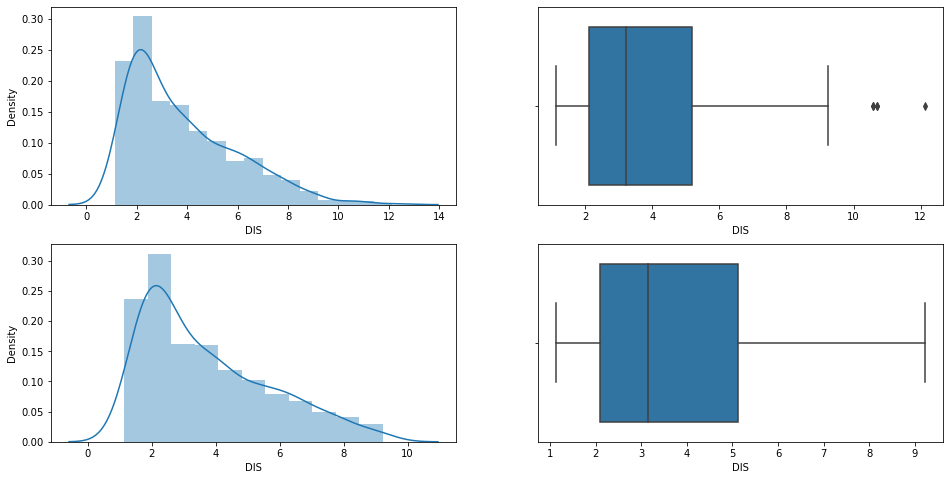

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(original_df['DIS'])
plt.subplot(2,2,2)
sns.boxplot(original_df['DIS'])
plt.subplot(2,2,3)
sns.distplot(df_boston['DIS'])
plt.subplot(2,2,4)
sns.boxplot(df_boston['DIS'])
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.8
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(original_df)
remov_low_var=original_df[original_df.columns[sel.get_support(indices=True)]]

In [ ]:
remov_low_var

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
remov_low_var.columns

Index(['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [ ]:
original_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
original_df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asset\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

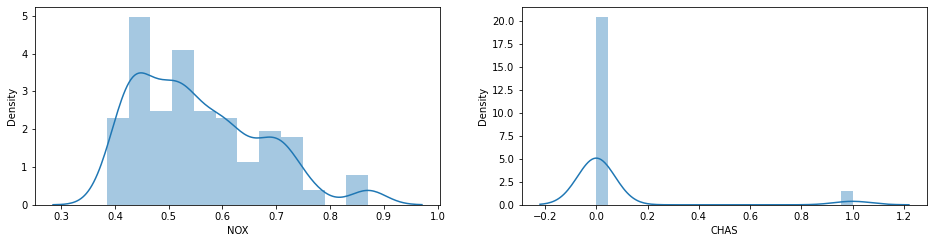

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(original_df['NOX'])
plt.subplot(2,2,2)
sns.distplot(original_df['CHAS'])

 ## **Usefull NOTES To Read 😉** :
 - If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.

- Or if only a handful of observations differ from a constant value, the variance will also be very low.

- This situation, where a feature has been poorly evaluated, or brings little information because it is (almost) constant can be a justification to remove a column.

- Otherwise, you have to set an arbitrarily variance threshold to determine which features to be remove. And, using the accuracy of the predictions as a result of a feature removal to prove that justification for feature removal is correct. Basically, its a trial and error.

- The variance threshold calculation depends on the probability density function of a particular distribution. For example if a feature has a normal distribution, use normal variance.

- Given in your problem statement, for a feature that has 95% or more variability, it is very close to zero. Hence, the feature will not help the performance of the model to predict the target. Therefore, it should be removed.

Variance threshold for feature selection:

- low variance features contains less information
calculate variance of each feature, then drop features with variance below some threshold
Example using the iris dataset: